In [1]:
import statistics as stat

128


In [2]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
basepath = '/gpfs/scratch/smdick/new/'
# basepath = '/gpfs/scratch/smdick/uf/'
# paths = ['seawulf/md_siesta_mull/md_siesta',
# #          'md_siesta_mull_szp/md_siesta',
# #          'md_siesta_descr_szp_uncorrected/md_siesta',
#          'mbpol/md_siesta_pure/md_siesta_10',
#          'mbpol/nose_128_10']
# paths = ['descr_sz_15/md_siesta',
#          'descr_sz_10/md_siesta',
#          'uf_test/md_siesta',
#          'uc_sz_5/md_siesta',
#          'uc_sz_10/md_siesta',
#          'uc_sz_15/md_siesta',
#          'descr_szp_5/md_siesta',
#          'descr_sz_5/md_siesta',
#          'mull_szp_5/md_siesta',
#          'mull_szp_10/md_siesta',
#          '../mbpol/md_siesta_pure/md_siesta_10']
# paths = [
# #             'md_siesta_mixer_uf_5/md_siesta',
# #          'md_siesta_mixer_uf_5_alt/md_siesta',
# #          'md_siesta_mixer_uf_5_uncorrected/md_siesta',
# #           'md_siesta_mixer_uf_8/md_siesta',
# #          'md_siesta_mixer_uf_10/md_siesta',
# #          'md_siesta_mixer_uf_15/md_siesta',
#           '../../uf/md_siesta_uftombp/md_siesta',
#           '../../uf/md_siesta_uftombp_8/md_siesta',
#           '../../uf/md_siesta_uftombp_10/md_siesta',
#           '../../uf/md_siesta_uftombp_dft/md_siesta']
# #          '../../mbpol/md_siesta_pure/md_siesta_10']
#          '../../mbpol/nose_128_10']
# paths = [ '../../uf/md_siesta_uftombp/md_siesta',
#           '../../uf/md_siesta_uftombp_8/md_siesta',
#           '../../uf/md_siesta_uftombp_10/md_siesta',
#           '../../uf/md_siesta_uftombp_dft/md_siesta']
# #          '../../mbpol/md_siesta_pure/md_siesta_10']
# #          '../../mbpol/nose_128_10']         
# paths = [ '/md_siesta_atomic_mixer/md_siesta',

# paths = ['/uf/md_siesta_uftombp_5/md_siesta',
#          '/md_siesta_descr/md_siesta',
# #           '/uf/md_siesta_uftombp_8/md_siesta',
#          'md_siesta_atomic_mixer/md_siesta',
# #          'md_siesta_atomic']
# #          '../../mbpol/md_siesta_pure/md_siesta_10']
#          '/mbpol/nose_128_10']  

# paths = ['md_siesta_uftombp_5/md_siesta',
# #          'md_siesta_uftombp_10/md_siesta',
#          'md_siesta_uftombp_15/md_siesta',
#          'md_siesta_uftombp_inf/md_siesta']
# # # #         '../mbpol/nose_128_10']

paths = ['md_siesta_uftodztombp_5/md_siesta',
#          'md_siesta_uftodztombp_10/md_siesta',
#          '../md_siesta_atomic_mixer/md_siesta',
         '../bugfix/md_siesta_uftodztombp_P_5/md_siesta',
         'md_siesta_uftodztombp_5_mol/md_siesta',
         'md_siesta_dztombp/md_siesta']
# #         '../mbpol/nose_128_10']

# paths = ['md_siesta_uftodz_5/md_siesta',
#          'md_siesta_uftodz_8/md_siesta',
#          'md_siesta_uftodz_10/md_siesta',
#          'md_siesta_uftodz_inf/md_siesta',
#          '../mbpol/md_siesta_pure/md_siesta_10']
# paths = ['../mbpol/nose_128_10']

t_equib = 500
dt = 5

In [4]:
r_oh_list = []
for p in paths:
    r_oh_list.append(stat.get_roh(basepath + p, t_equib, dt, dt))


In [5]:
r_oo_list = []
for p in paths:
    r_oo_list.append(stat.get_roo(basepath + p, t_equib, dt, dt))


In [6]:
r_hh_list = []
for p in paths:
    r_hh_list.append(stat.get_rhh(basepath + p, t_equib, dt, dt))


In [7]:
r_oo_list.append(np.genfromtxt('/gpfs/scratch/smdick/new/mbpol_bins/r_oo.bins', delimiter = ','))
r_oh_list.append(np.genfromtxt('/gpfs/scratch/smdick/new/mbpol_bins/r_oh.bins', delimiter = ','))
r_hh_list.append(np.genfromtxt('/gpfs/scratch/smdick/new/mbpol_bins/r_hh.bins', delimiter = ','))
paths.append('../mbpol/nose_128_10')

In [8]:
runtimes = []
for p in paths:
    runtimes.append(len(pd.read_csv(basepath + p +'.log', delim_whitespace = True)) / 2000 - t_equib/2000)

/gpfs/home/smdick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
runtimes

[5.9105, 4.311, 1.2545, 2.055, 68.9615]

In [10]:
logs = []
for path in paths:
    logs.append(pd.read_csv(basepath + path + '.log', 
                                delim_whitespace = True, index_col = 0).drop('Time[ps]').astype(float))

for log in logs:
    print('T = {:.0f}+/-{:.0f} K'.format(log['T[K]'].mean(), log['T[K]'].std()))

T = 299+/-14 K
T = 299+/-14 K
T = 299+/-20 K
T = 299+/-16 K
T = 297+/-13 K


/gpfs/home/smdick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


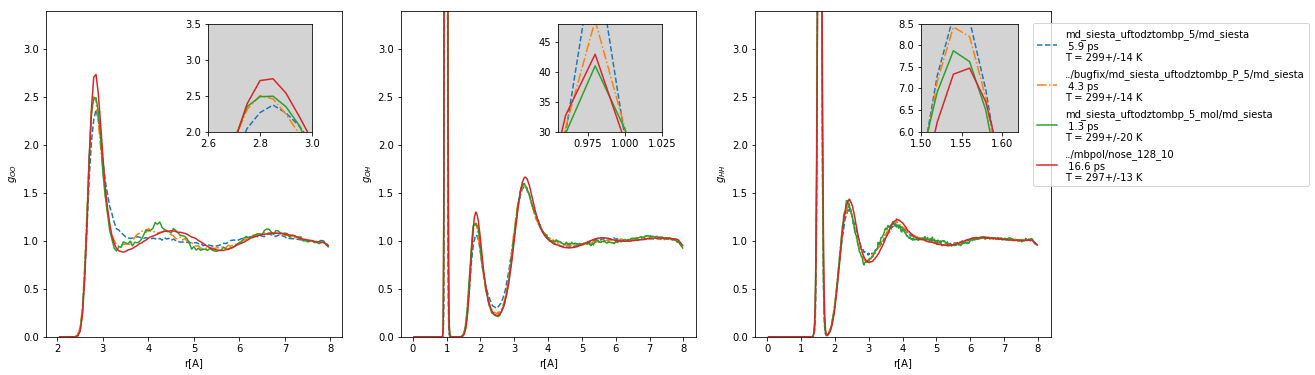

In [20]:
# labels = ['descriptor', 'mulliken', 'mulliken szp', 'szp uncorrected', 'dzp custom uncorrected', 'mbpol']
# labels = ['descriptor (sz) 15','descriptor (sz) 10', 'ultra-fast 5','uncorrected sz 5',
#           'uncorrected sz 10','uncorrected sz 15'
#           'descriptor (szp) 5', 'descriptor (sz) 5',
#           'mulliken (szp)', 'mulliken (szp), N = 10','dzp custom']
# labels = ['N = 5', 'N = 5 (alt)', 'N = 5 (uncorrected)','N = 10','N = 15','N = 1']
labels = ['N=3','N = 5', 'N = 8', 'N = 10','N = 15','to_mbpol','N = 1','MB-pol']
# labels = ['5','8','10','inf','DFT']
# labels = ['UF -> MB-pol', 'RSD', 'RSD (atomic)', 'MB-pol']
labels = ['5','15','inf','MB-pol']
labels = paths + ['MB-pol']
# labels = ['5','inf','pure','MB-pol']
# labels = [l[:-len('/md_siesta')] for l in paths]
# choice = ['descriptor', 'mulliken', 'mbpol', 'dzp custom uncorrected']
# choice = ['mulliken szp', 'szp uncorrected', 'dzp custom uncorrected']
# choice = ['descriptor (sz) 15', 'descriptor (sz) 10', 'descriptor (sz) 5', 'dzp custom']
# choice = np.array(labels)[[-3,-2,-1]]
# choice = np.array(labels)[[1,2,3,6]]
# choice =  ['5','inf','pure']
choice = np.array(labels)[[0,1,2,4]]
styles = ['--','-.','-','-', '-','-','-','-','-','-','-','-']
figure(figsize = (18,6))
bins1 = np.arange(2,8,0.05)[1:]
bins2 = np.arange(0,8,0.02)[1:]

a = 0
b = 0
c = 0
axes_list = [a,b,c]
insets = [[.25, .6, .08, .25], [.52, .6, .08, .25],[.8, .6, .075, .25]]
# insets_xlims = [[2.7,2.9], [0.975,1.025], [1.52,1.63]]
# insets_ylims = [[2.7,3.1], [25,38], [6,7.25]]
insets_xlims = [[2.6,3.0], [0.955,1.025], [1.5,1.62]]
insets_ylims = [[2.0,3.5], [30,48], [6,8.5]]
max_t = max([len(data) for data in r_oo_list])
# max_t = 12000

for i, [data,bins,div, t, inset, xl, yl] in enumerate(zip([r_oo_list, r_oh_list, r_hh_list],
                                        [bins1,bins2,bins2],
                                        [1,4,2],
                                        ['OO', 'OH', 'HH'],
                                         insets, insets_xlims, insets_ylims)):
    
    subplot(1,3,i+1)
    
    for r_oo, l, rt, s in zip(data, labels, runtimes, styles):
        if l in choice:
            plot(bins, (np.mean(r_oo[:max_t], axis = 0)/div), label = l +'\n {:.1f} ps'.format(rt), ls = s)
    
    ylim(0,3.4)
#     xlim(1,8)
    xlabel('r[A]')
    ylabel('$g_{' + t + '}$' )
#     legend()
    if i > -1:
        axes(inset, facecolor = 'lightgray')
    #     xticks([])
    #     yticks([])
        for r_oo, l, rt, s, log in zip(data, labels, runtimes, styles, logs):
            if l in choice:
                plot(bins, np.mean(r_oo[:max_t], axis = 0)/div,
                     label = l +'\n {:.1f} ps'.format(min(len(r_oo)*dt/2000,(max_t * dt)/2000)) + '\nT = {:.0f}+/-{:.0f} K'.format(log['T[K]'].mean(), log['T[K]'].std()),
                     ls = s)
        xlim(*xl)
        ylim(*yl)
legend(bbox_to_anchor=(1.1, 1.05))
# savefig('../figs/rdfs_uftodz.eps', bbox_inches = 'tight')
# savefig('../figs/rdfs_uftodz.pdf', bbox_inches = 'tight')

In [21]:
# pd.DataFrame(r_oo_list[0]).to_csv('/gpfs/scratch/smdick/new/mbpol_bins/r_oo.bins', index = None, header = None)
# pd.DataFrame(r_oh_list[0]).to_csv('/gpfs/scratch/smdick/new/mbpol_bins/r_oh.bins', index = None, header = None)
# pd.DataFrame(r_hh_list[0]).to_csv('/gpfs/scratch/smdick/new/mbpol_bins/r_hh.bins', index = None, header = None)
# pd.DataFrame(bins).to_csv('/gpfs/scratch/smdick/new/mbpol_bins/bins', index = None, header = None)